Melakukan import, sebagai berikut :

*   Untuk membuat data frame maka dilakukan import pandas sebagai pd.
*   Untuk menampilkan grafik plot dilakukan import matplotlib.pyplot sebagai plt.
*   Untuk menampilkan gradik plot dilakukan import seaborn sebagai sns.


In [1]:
#import modules
import pandas as pd # for dataframes
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports

import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [3]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

##Data Source

Setelah itu mengambil dataset dan menunjukkan 5 data terakhir.

In [4]:
#ambil dataset dan menunjukkan dari 5 terakhir
dttrain = pd.read_csv('/content/train.csv')
dttrain.tail()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0
11152,JG04,2.828427,PG04,2.121320,1.473092,RM_type_B,2,1980,Y,2,level_5,3.14,2009,14,5,7,0,2,0,79.99,1.0,0


Menampilkan banyak baris dan kolom pada data di atas. Dapat dilihat bahwa banyak baris 11153 dan banyak kolom 22.

In [5]:
#banyak baris dan kolom pada data
print('Rows:', dttrain.shape[0], '| Columns:', dttrain.shape[1])

Rows: 11153 | Columns: 22


Menampilkan info pada dataset

In [6]:
#info pada dataset
dttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

Untuk mengetahui jumlah value pada tiap kolom, dapat dilihat

In [7]:
#mengetahui jumlah value pada tiap kolom
dttrain.nunique()

job_level                                   3
job_duration_in_current_job_level          97
person_level                                8
job_duration_in_current_person_level       72
job_duration_in_current_branch             69
Employee_type                               3
gender                                      2
age                                        35
marital_status_maried(Y/N)                  2
number_of_dependences                       7
Education_level                             6
GPA                                       216
year_graduated                             38
job_duration_from_training                 31
branch_rotation                            19
job_rotation                               15
assign_of_otherposition                    26
annual leave                               21
sick_leaves                                39
Last_achievement_%                       6104
Achievement_above_100%_during3quartal       4
Best Performance                  

Untuk mengetahui value pada tiap kolom

In [8]:
#mengetahui value tiap kolom
print(dttrain['job_level'].unique())
print(dttrain['person_level'].unique())
print(dttrain['Employee_type'].unique())
print(dttrain['gender'].unique())
print(dttrain['marital_status_maried(Y/N)'].unique())
print(dttrain['Education_level'].unique())
print(dttrain['assign_of_otherposition'].unique())
print(dttrain['Best Performance'].unique())
print(dttrain['Achievement_above_100%_during3quartal'].unique())

['JG04' 'JG05' 'JG03']
['PG03' 'PG06' 'PG05' 'PG04' 'PG07' 'PG02' 'PG01' 'PG08']
['RM_type_A' 'RM_type_C' 'RM_type_B']
[2 1]
['Y' 'N']
['level_0' 'level_1' 'level_2' 'level_3' 'level_4' 'level_5']
[ 2  0  6  4  1  7 17 11  5  3  9  8 12 16 10 14 19 13 18 15 22 29 27 20
 24 21]
[0 1]
[ 0.  1.  2.  3. nan]


In [ ]:
#Print all of the object data types and their unique values
for column in dttrain.columns:
    if dttrain[column].dtype == object:
        print(str(column) + ' : ' + str(dttrain[column].unique()))
        print(dttrain[column].value_counts())
        print("_________________________________________________________________")

job_level : ['JG04' 'JG05' 'JG03']
JG04    10413
JG05      704
JG03       36
Name: job_level, dtype: int64
_________________________________________________________________
person_level : ['PG03' 'PG06' 'PG05' 'PG04' 'PG07' 'PG02' 'PG01' 'PG08']
PG03    9655
PG04     757
PG06     378
PG05     308
PG01      19
PG07      19
PG02      16
PG08       1
Name: person_level, dtype: int64
_________________________________________________________________
Employee_type : ['RM_type_A' 'RM_type_C' 'RM_type_B']
RM_type_A    7287
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64
_________________________________________________________________
marital_status_maried(Y/N) : ['Y' 'N']
Y    9501
N    1652
Name: marital_status_maried(Y/N), dtype: int64
_________________________________________________________________
Education_level : ['level_0' 'level_1' 'level_2' 'level_3' 'level_4' 'level_5']
level_4    9222
level_3    1743
level_1     140
level_5      43
level_2       4
level_0    

Mencari data kosong pada dataset. Data kosong yaitu masih memiliki sebuah nilai yaitu string tanpa teks.

In [9]:
#mencari data kosong pada dataset
dttrain.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [10]:
dttrain.loc[1880:1885]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1880,JG04,1.191638,PG03,1.191638,1.581139,RM_type_A,2,1988,Y,0,level_3,0.00,2009,5,2,2,2,8,0,46.63,0.0,1
1881,JG04,1.118034,PG03,1.118034,0.707107,RM_type_A,2,1987,Y,0,level_3,3.10,2008,7,4,5,2,1,0,49.94,0.0,1
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,level_3,2.88,2012,5,4,5,0,1,15,NaN,NaN,0
1883,JG04,1.153256,PG03,1.153256,0.707107,RM_type_B,2,1985,Y,0,level_3,2.98,2007,2,2,2,1,6,0,39.15,0.0,0
1884,JG04,1.292285,PG03,1.292285,0.648074,RM_type_B,2,1983,Y,0,level_3,3.17,2007,6,3,4,0,5,3,4.69,0.0,0
1885,JG04,1.385641,PG03,1.385641,1.081665,RM_type_A,2,1990,Y,1,level_3,3.07,2011,5,4,3,4,4,0,84.50,0.0,0


Menghapus baris 1882 karena pada kolom 1882 terdapat data yang kosong.

In [11]:
dttrain.iloc[1882,:]

job_level                                     JG04
job_duration_in_current_job_level          1.29228
person_level                                  PG03
job_duration_in_current_person_level       1.29228
job_duration_in_current_branch            0.911043
Employee_type                            RM_type_A
gender                                           1
age                                           1991
marital_status_maried(Y/N)                       N
number_of_dependences                            0
Education_level                            level_3
GPA                                           2.88
year_graduated                                2012
job_duration_from_training                       5
branch_rotation                                  4
job_rotation                                     5
assign_of_otherposition                          0
annual leave                                     1
sick_leaves                                     15
Last_achievement_%             

In [12]:
#menghapus baris 1882
dtnew = dttrain.drop(dttrain.index[1882])

In [ ]:
dtnew = dttrain.dropna(axis=0)

In [13]:
#cek data kosong pada dataset
dtnew.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

Mengubah Nama Variabel

In [14]:
#Rename variabel
dtnew = dtnew.rename(index=str, columns={'Best Performance':'bestp'})
dtnew1 = dtnew.rename(index=str, columns={'Last_achievement_%':'LastAchievement'})
dtready = dtnew1.rename(index=str, columns={'Achievement_above_100%_during3quartal':'Achievement3quartal'})

Menampilkan data sasaran (yang dipilih) dari bestp.

In [15]:
#data insight
bestp = dtready.groupby('bestp')
bestp.mean()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,LastAchievement,Achievement3quartal
bestp,,,,,,,,,,,,,,,,
0,1.431977,1.347048,1.031672,1.739149,1985.873043,0.999264,3.219005,2009.188334,6.237940,3.704151,3.499737,1.210615,3.675775,1.086075,72.355672,0.681240
1,1.440450,1.361866,1.052010,1.715333,1985.624924,0.974343,2.927544,2009.089798,6.511301,3.813073,3.539401,1.157605,3.598656,1.173488,71.532932,0.666463


In [16]:
#deskripsi dataset 
dtready.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,LastAchievement,Achievement3quartal,bestp
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.00000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,1.433221,1.349223,1.034658,1.735653,1985.836621,0.995606,3.176221,2009.17387,6.278067,3.720140,3.505560,1.202834,3.664455,1.098906,72.234902,0.679071,0.146790
std,0.431103,0.324674,0.416740,0.441005,4.632164,0.881092,13.322284,4.11726,5.033764,2.399174,1.818055,2.575228,2.652647,2.711453,23.030421,1.107381,0.353912
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.00000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.00000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.00000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.00000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.00000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


Menampilkan korelasi antar data. Dapat dilihat melalui output jika yang mempunyai korelasi positif adalah job_duration_in_current_job_level. Untuk korelasi negatif yaitu pada bestp.

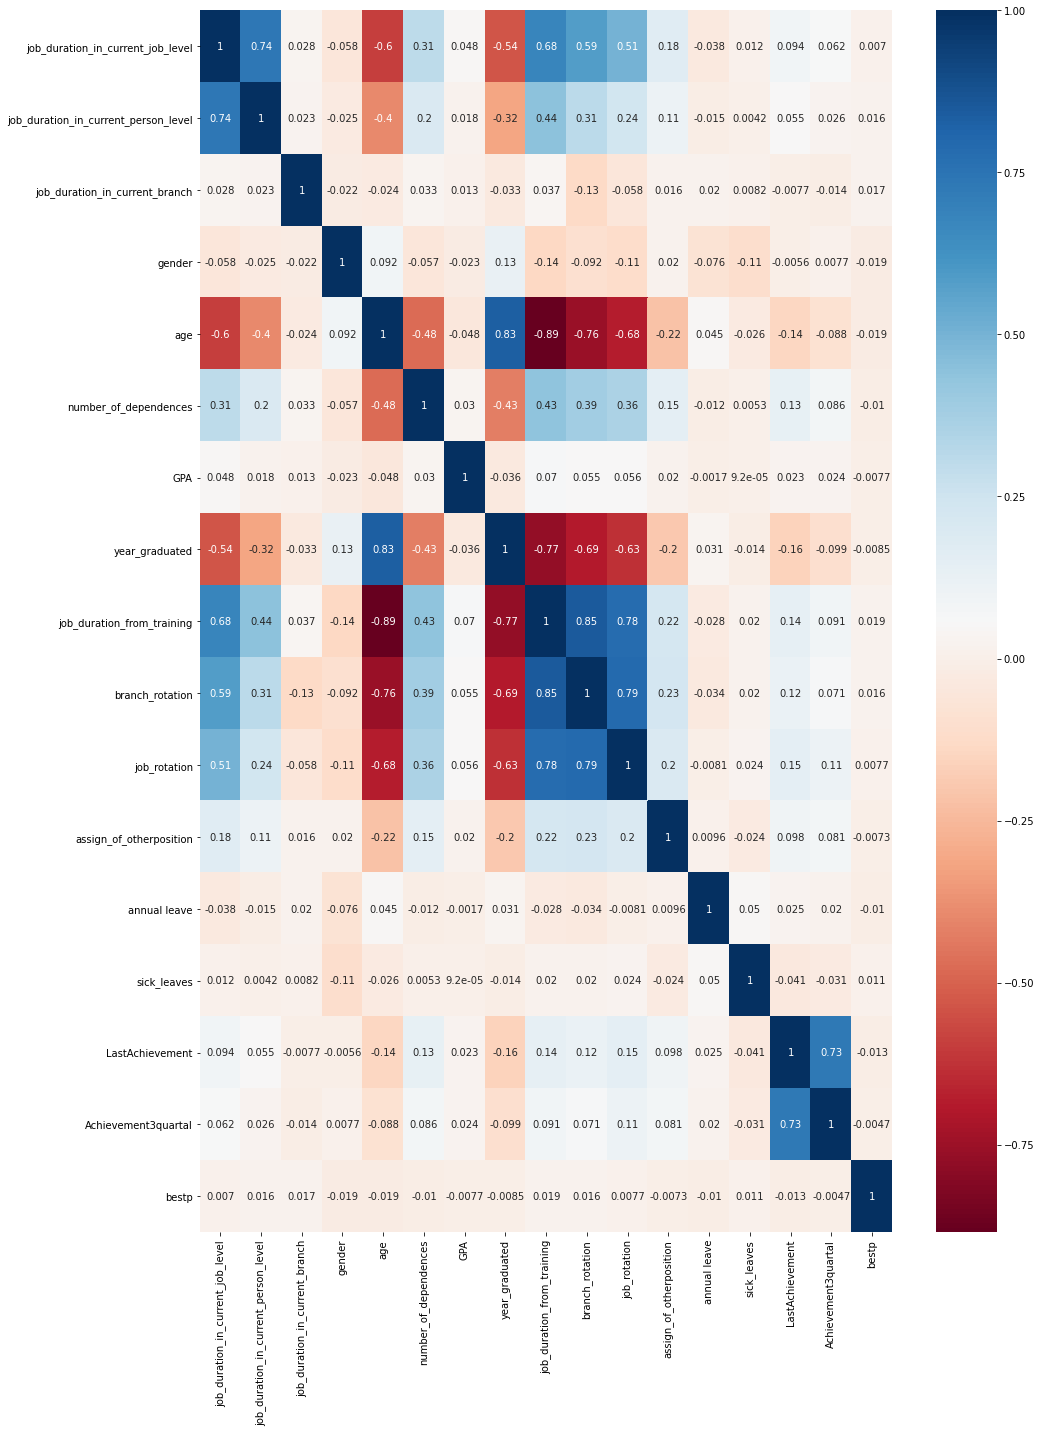

In [17]:
#Korelasi antar data
plt.figure(figsize=(15,20))
sns.heatmap(dtready.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

##Data Visualization

Data visualization adalah tampilan berupa grafis atau visual dari informasi dan data. Data visualization mengubah kumpulan data menjadi hal lebih sederhana untuk ditampilkan. Dengan adanya data visualization, maka akan lebih mudah memahami tren, outliers, dan pola dalam suatu data.


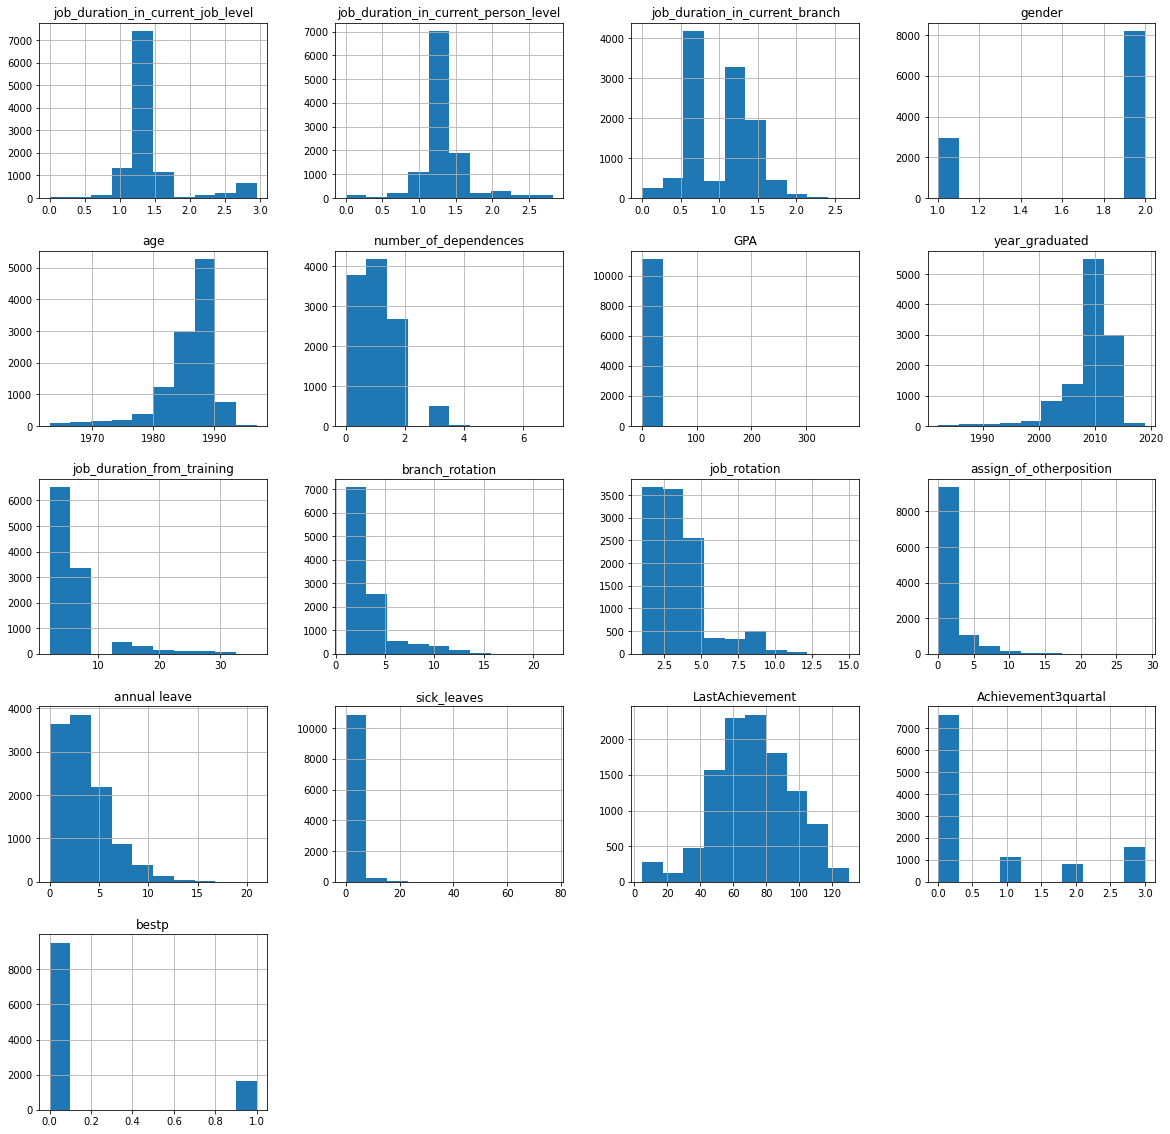

In [18]:
dtready.hist(figsize=(20,20))
plt.show()

Last Achievement satu-satunya berdistribusi normal

nd, jr, al condong ke kanan

GPA konstan

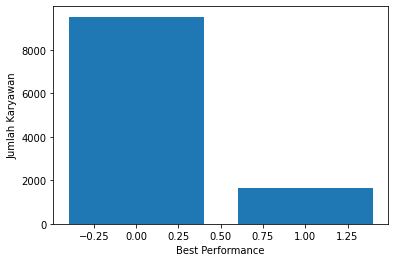

In [19]:
#Cek jumlah karyawan yang mendapat best performance
bp_count=dtready.groupby('bestp').count()
plt.bar(bp_count.index.values, bp_count['job_duration_in_current_job_level'])
plt.xlabel('Best Performance')
plt.ylabel('Jumlah Karyawan')
plt.show()

In [20]:
dtready.bestp.value_counts()

0    9515
1    1637
Name: bestp, dtype: int64

Jumlah karyawan yang mendapat penghargaan terakhir dapat dilihat pada plot di bawah. Terdapat 51 karyawan mendapatkan 16 penghargaan terakhir, dan seterusnya dapat dilihat pada plot di bawah ini. Hingga terdapat 5 karyawan mendapat 120 penghargaan terakhir.



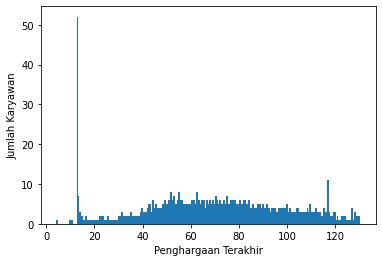

In [21]:
la_projects=dtready.groupby('LastAchievement').count()
plt.bar(la_projects.index.values, la_projects['job_duration_in_current_job_level'])
plt.xlabel('Penghargaan Terakhir')
plt.ylabel('Jumlah Karyawan')
plt.show()

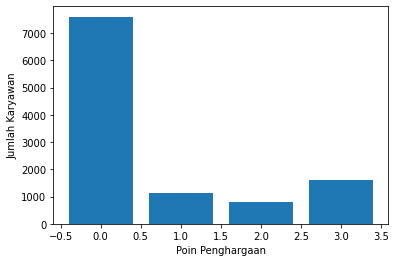

In [22]:

a3_projects=dtready.groupby('Achievement3quartal').count()
plt.bar(a3_projects.index.values, a3_projects['job_duration_in_current_job_level'])
plt.xlabel('Poin Penghargaan')
plt.ylabel('Jumlah Karyawan')
plt.show()

Jumlah karyawan yang mendapat poin penghargaan yaitu dapat dilihat pada plot di atas, untuk lebih spesifiknya diliat pada Achievment3Quartal pada value_counts yaitu sejumlah 7597 karyawan yang mendapat 0.0 poin penghargaan. Terdapat 1141 karyawan mendapat 1.0 poin penghargaan. Terdapat 810 karyawan mendapat 2.0 poin penghargaan. Terdapat 1604 karyawan mendapat 3.0 poin penghargaan.

In [23]:
dtready.Achievement3quartal.value_counts()

0.0    7597
3.0    1604
1.0    1141
2.0     810
Name: Achievement3quartal, dtype: int64

###Distribusi fitur-fitur berdasarkan Best Performance

In [24]:
dtready.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'LastAchievement', 'Achievement3quartal', 'bestp'],
      dtype='object')

### Job Level

In [25]:
#Variabel Job Level
dtready['job_level'].value_counts()

JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64

In JG04, the ratio of leavers is 14.63%
In JG05, the ratio of leavers is 15.06%
In JG03, the ratio of leavers is 22.22%


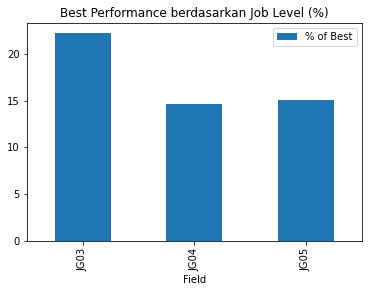

In [26]:
jobLevel = pd.DataFrame(columns=["Field", "% of Best"])
i=0
for field in list(dtready['job_level'].unique()):
    ratio = dtready[(dtready['job_level']==field)&(dtready['bestp']==1)].shape[0] / dtready[dtready['job_level']==field].shape[0]
    jobLevel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = jobLevel.groupby(by="Field").sum()
df_JL.plot(kind='bar',title='Best Performance berdasarkan Job Level (%)')

###Job Duration in Current Job Level

In [27]:
print("Number of job duration in current job level from {} to {} years.".format(
    dtready['job_duration_in_current_job_level'].min(), dtready['job_duration_in_current_job_level'].max()))

Number of job duration in current job level from 0.0 to 2.9580398915498103 years.


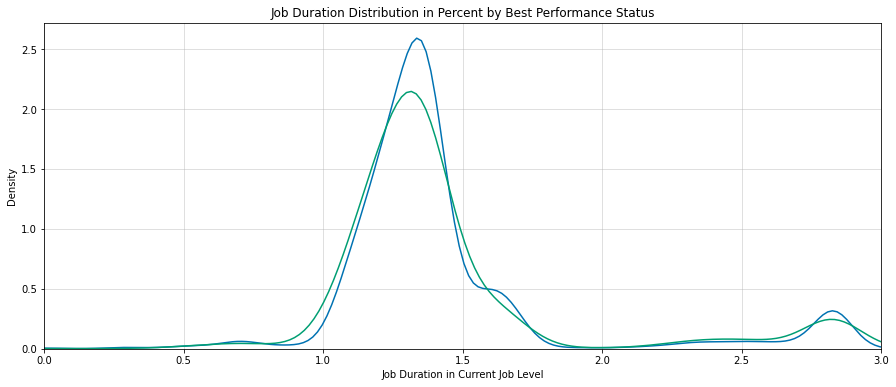

In [28]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'job_duration_in_current_job_level'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'job_duration_in_current_job_level'], label = 'Best Performance')
plt.xlim(left=0, right=3)
plt.xlabel('Job Duration in Current Job Level')
plt.ylabel('Density')
plt.title('Job Duration Distribution in Percent by Best Performance Status');

###Person Level

In [29]:
#Variabel Person Level
dtready['person_level'].value_counts()

PG03    9654
PG04     757
PG06     378
PG05     308
PG07      19
PG01      19
PG02      16
PG08       1
Name: person_level, dtype: int64

In PG03, the ratio of leavers is 14.73%
In PG06, the ratio of leavers is 18.78%
In PG05, the ratio of leavers is 10.39%
In PG04, the ratio of leavers is 13.34%
In PG07, the ratio of leavers is 10.53%
In PG02, the ratio of leavers is 18.75%
In PG01, the ratio of leavers is 26.32%
In PG08, the ratio of leavers is 100.00%


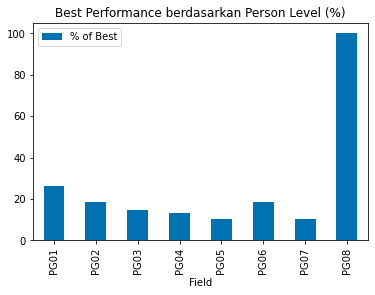

In [30]:
personLevel = pd.DataFrame(columns=["Field", "% of Best"])
i=0
for field in list(dtready['person_level'].unique()):
    ratio = dtready[(dtready['person_level']==field)&(dtready['bestp']==1)].shape[0] / dtready[dtready['person_level']==field].shape[0]
    personLevel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PL = personLevel.groupby(by="Field").sum()
df_PL.plot(kind='bar',title='Best Performance berdasarkan Person Level (%)')

###Job Duration in Curent Person Level

In [31]:
print("Number of job duration in current person level from {} to {} years.".format(
    dtready['job_duration_in_current_person_level'].min(), dtready['job_duration_in_current_person_level'].max()))

Number of job duration in current person level from 0.0 to 2.82842712474619 years.


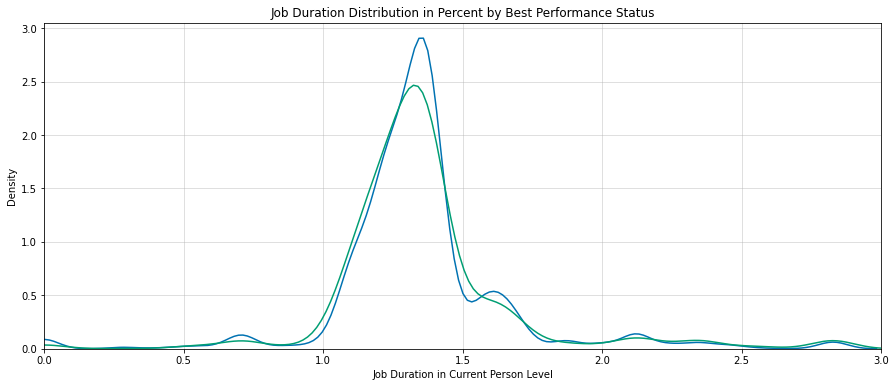

In [32]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'job_duration_in_current_person_level'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'job_duration_in_current_person_level'], label = 'Best Performance')
plt.xlim(left=0, right=3)
plt.xlabel('Job Duration in Current Person Level')
plt.ylabel('Density')
plt.title('Job Duration Distribution in Percent by Best Performance Status');

###Job Duration in Current Branch

In [33]:
print("Number of job duration in current branch from {} to {} years.".format(
    dtready['job_duration_in_current_branch'].min(), dtready['job_duration_in_current_branch'].max()))

Number of job duration in current branch from 0.0 to 2.67768556779918 years.


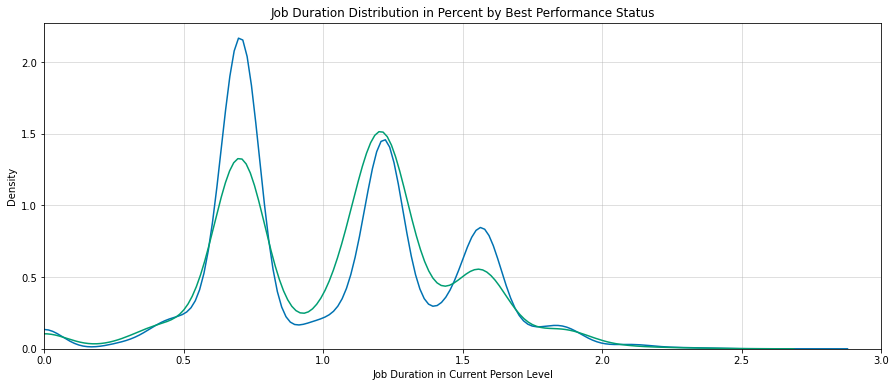

In [34]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'job_duration_in_current_branch'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'job_duration_in_current_branch'], label = 'Best Performance')
plt.xlim(left=0, right=3)
plt.xlabel('Job Duration in Current Person Level')
plt.ylabel('Density')
plt.title('Job Duration Distribution in Percent by Best Performance Status');

###Employee Type

In [35]:
#Variabel Employee Type
dtready['Employee_type'].value_counts()

RM_type_A    7286
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64

In RM_type_A, the ratio of leavers is 14.14%
In RM_type_C, the ratio of leavers is 14.20%
In RM_type_B, the ratio of leavers is 15.92%


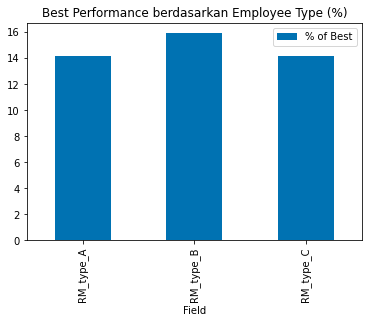

In [36]:
EmployeeType = pd.DataFrame(columns=["Field", "% of Best"])
i=0
for field in list(dtready['Employee_type'].unique()):
    ratio = dtready[(dtready['Employee_type']==field)&(dtready['bestp']==1)].shape[0] / dtready[dtready['Employee_type']==field].shape[0]
    EmployeeType.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_ET = EmployeeType.groupby(by="Field").sum()
df_ET.plot(kind='bar',title='Best Performance berdasarkan Employee Type (%)')

###Gender

In [37]:
#Variabel Gender
dtready['gender'].value_counts()

2    8204
1    2948
Name: gender, dtype: int64

In [38]:
print("Normalised gender distribution of Best Performance in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((dtready[(dtready['bestp'] == 1) & (
    dtready['gender'] == 1)].shape[0] / dtready[dtready['gender'] == 1].shape[0])*100, 
    (dtready[(dtready['bestp'] == 1) & (dtready['gender'] == 2)].shape[0] / dtready[dtready['gender'] == 2].shape[0])*100))

Normalised gender distribution of Best Performance in the dataset: Male = 15.8%; Female 14.3%.


In 2, the ratio of leavers is 14.27%
In 1, the ratio of leavers is 15.81%


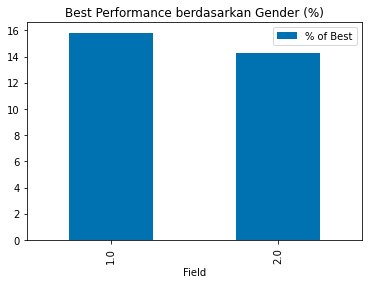

In [39]:
gender = pd.DataFrame(columns=["Field", "% of Best"])
i=0
for field in list(dtready['gender'].unique()):
    ratio = dtready[(dtready['gender']==field)&(dtready['bestp']==1)].shape[0] / dtready[dtready['gender']==field].shape[0]
    gender.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = gender.groupby(by="Field").sum()
df_G.plot(kind='bar',title='Best Performance berdasarkan Gender (%)')

###Age

In [40]:
(mu, sigma) = norm.fit(dtready.loc[dtready['bestp'] == 0, 'age'])
print(
    'No Best Performance: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(dtready.loc[dtready['bestp'] == 1, 'age'])
print('Best Performance: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

No Best Performance: average age = 1985.9 years old and standard deviation = 4.6
Best Performance: average age = 1985.6 years old and standard deviation = 5.0


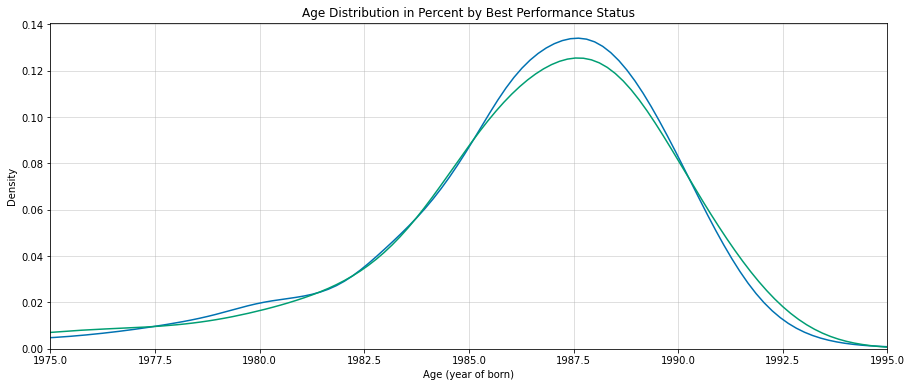

In [41]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'age'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'age'], label = 'Best Performance')
plt.xlim(left=1975, right=1995)
plt.xlabel('Age (year of born)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Best Performance Status');

###Marital Status

In [42]:
#Variabel Marital
dtready['marital_status_maried(Y/N)'].value_counts()

Y    9501
N    1651
Name: marital_status_maried(Y/N), dtype: int64

In [43]:
print("Normalised marital status distribution of Best Performance in the dataset: Yes = {:.1f}%; No {:.1f}%.".format((dtready[(dtready['bestp'] == 1) & (
    dtready['marital_status_maried(Y/N)'] == 'Y')].shape[0] / dtready[dtready['marital_status_maried(Y/N)'] == 'Y'].shape[0])*100, 
    (dtready[(dtready['bestp'] == 1) & (dtready['marital_status_maried(Y/N)'] == 'N')].shape[0] / dtready[dtready['marital_status_maried(Y/N)'] == 'N'].shape[0])*100))

Normalised marital status distribution of Best Performance in the dataset: Yes = 14.5%; No 15.7%.


In Y, the ratio of leavers is 14.49%
In N, the ratio of leavers is 15.75%


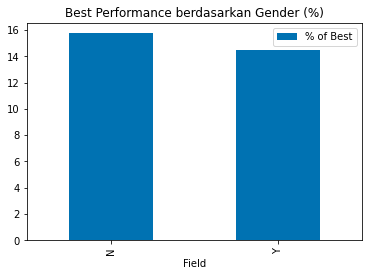

In [44]:
MS = pd.DataFrame(columns=["Field", "% of Best"])
i=0
for field in list(dtready['marital_status_maried(Y/N)'].unique()):
    ratio = dtready[(dtready['marital_status_maried(Y/N)']==field)&(dtready['bestp']==1)].shape[0] / dtready[dtready['marital_status_maried(Y/N)']==field].shape[0]
    MS.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MS = MS.groupby(by="Field").sum()
df_MS.plot(kind='bar',title='Best Performance berdasarkan Gender (%)')

###Number of Dependences

In [45]:
print("Number of dependences from {} to {}.".format(
    dtready['number_of_dependences'].min(), dtready['number_of_dependences'].max()))

Number of dependences from 0 to 7.


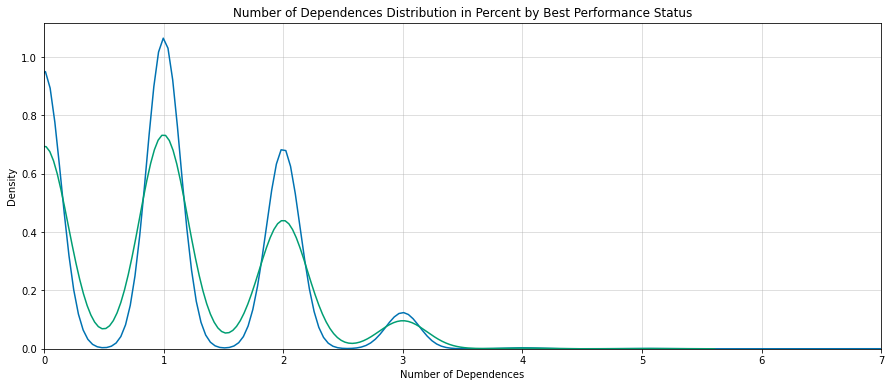

In [46]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'number_of_dependences'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'number_of_dependences'], label = 'Best Performance')
plt.xlim(left=0, right=7)
plt.xlabel('Number of Dependences')
plt.ylabel('Density')
plt.title('Number of Dependences Distribution in Percent by Best Performance Status');

###Education Level

In [47]:
#Variabel Education Level
dtready['Education_level'].value_counts()

level_4    9222
level_3    1742
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In level_0, the ratio of leavers is 0.00%
In level_1, the ratio of leavers is 19.29%
In level_2, the ratio of leavers is 0.00%
In level_3, the ratio of leavers is 15.04%
In level_4, the ratio of leavers is 14.55%
In level_5, the ratio of leavers is 13.95%


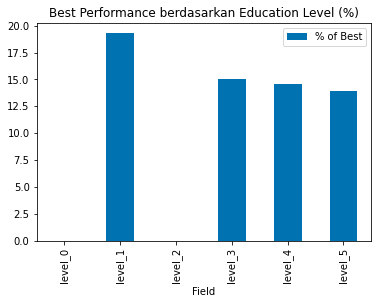

In [48]:
EL = pd.DataFrame(columns=["Field", "% of Best"])
i=0
for field in list(dtready['Education_level'].unique()):
    ratio = dtready[(dtready['Education_level']==field)&(dtready['bestp']==1)].shape[0] / dtready[dtready['Education_level']==field].shape[0]
    EL.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EL = EL.groupby(by="Field").sum()
df_EL.plot(kind='bar',title='Best Performance berdasarkan Education Level (%)')

###GPA

In [49]:
print("Number of GPA {} to {}.".format(
    dtready['GPA'].min(), dtready['GPA'].max()))

Number of GPA 0.0 to 378.0.


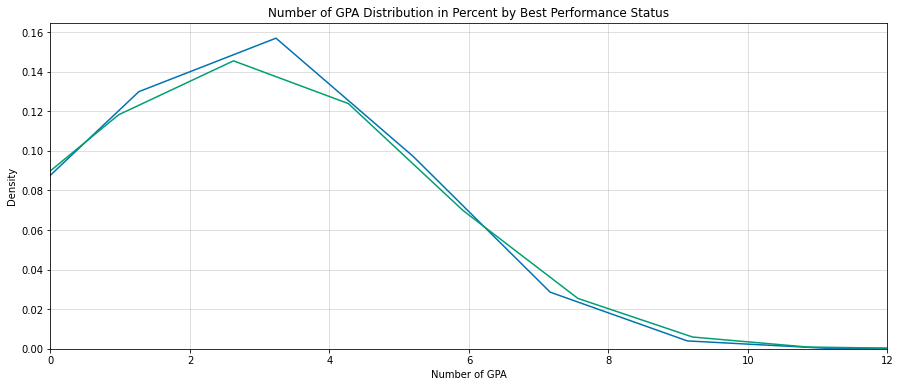

In [50]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'GPA'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'GPA'], label = 'Best Performance')
plt.xlim(left=0, right=12)
plt.xlabel('Number of GPA')
plt.ylabel('Density')
plt.title('Number of GPA Distribution in Percent by Best Performance Status');

###Year Graduated

In [51]:
print("Number of year graduated {} to {}.".format(
    dtready['year_graduated'].min(), dtready['year_graduated'].max()))

Number of year graduated 1982 to 2019.


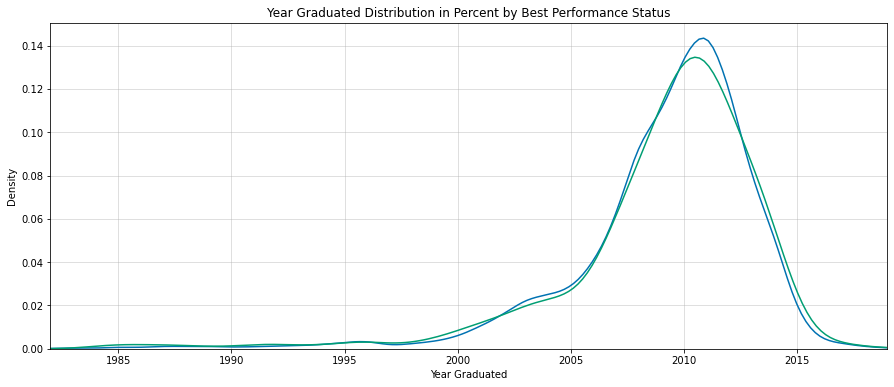

In [52]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'year_graduated'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'year_graduated'], label = 'Best Performance')
plt.xlim(left=1982, right=2019)
plt.xlabel('Year Graduated')
plt.ylabel('Density')
plt.title('Year Graduated Distribution in Percent by Best Performance Status');

###Job Duration from Job Training


In [53]:
print("Number of Job Duration from Job Training {} to {} years.".format(
    dtready['job_duration_from_training'].min(), dtready['job_duration_from_training'].max()))

Number of Job Duration from Job Training 2 to 36 years.


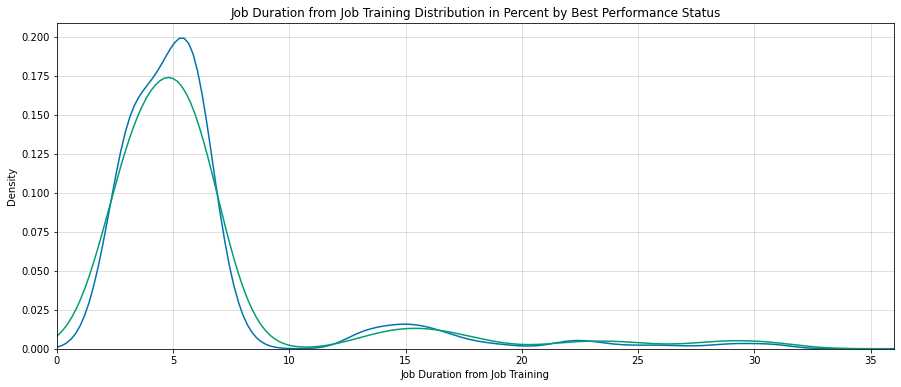

In [54]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'job_duration_from_training'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'job_duration_from_training'], label = 'Best Performance')
plt.xlim(left=0, right=36)
plt.xlabel('Job Duration from Job Training')
plt.ylabel('Density')
plt.title('Job Duration from Job Training Distribution in Percent by Best Performance Status');

###Branch Rotation

In [55]:
print("Number of Branch Rotation {} to {}.".format(
    dtready['branch_rotation'].min(), dtready['branch_rotation'].max()))

Number of Branch Rotation 1 to 22.


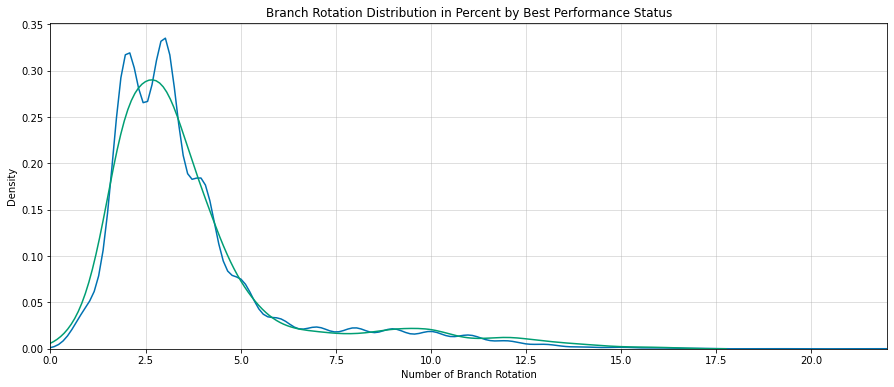

In [56]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'branch_rotation'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'branch_rotation'], label = 'Best Performance')
plt.xlim(left=0, right=22)
plt.xlabel('Number of Branch Rotation')
plt.ylabel('Density')
plt.title('Branch Rotation Distribution in Percent by Best Performance Status');

###Job Rotation

In [57]:
print("Number of Job Rotation {} to {}.".format(
    dtready['job_rotation'].min(), dtready['job_rotation'].max()))

Number of Job Rotation 1 to 15.


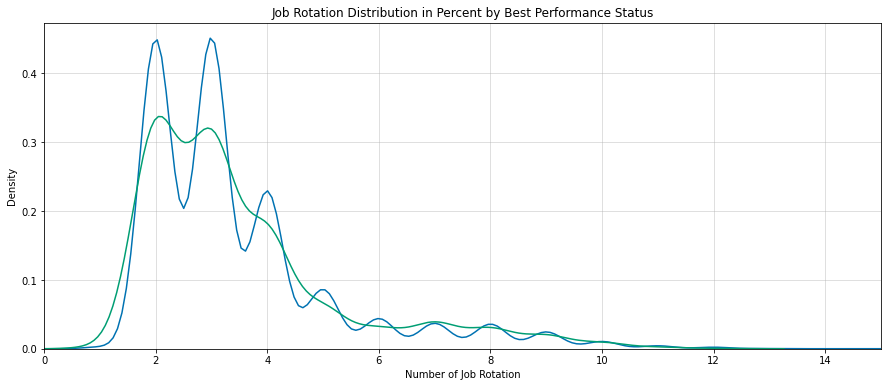

In [58]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'job_rotation'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'job_rotation'], label = 'Best Performance')
plt.xlim(left=0, right=15)
plt.xlabel('Number of Job Rotation')
plt.ylabel('Density')
plt.title('Job Rotation Distribution in Percent by Best Performance Status');

###Assign of Other Position

In [59]:
print("Number of Assign of Other Position {} to {}.".format(
    dtready['assign_of_otherposition'].min(), dtready['assign_of_otherposition'].max()))

Number of Assign of Other Position 0 to 29.


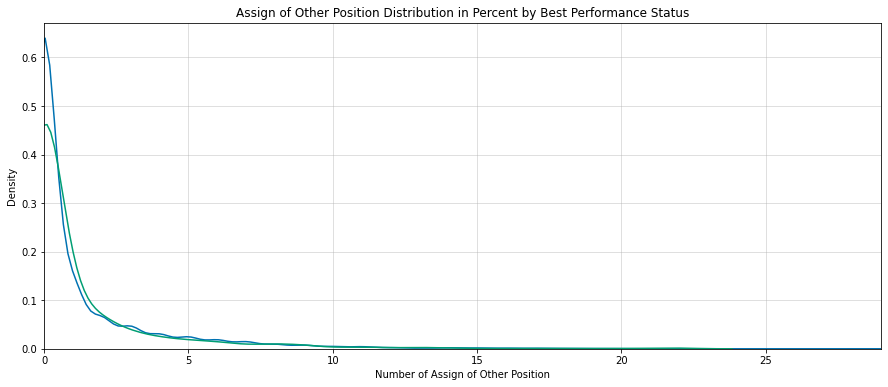

In [60]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'assign_of_otherposition'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'assign_of_otherposition'], label = 'Best Performance')
plt.xlim(left=0, right=29)
plt.xlabel('Number of Assign of Other Position')
plt.ylabel('Density')
plt.title('Assign of Other Position Distribution in Percent by Best Performance Status');

###Annual Leaves

In [61]:
print("Number of Annual Leaves {} to {}.".format(
    dtready['annual leave'].min(), dtready['annual leave'].max()))

Number of Annual Leaves 0 to 21.


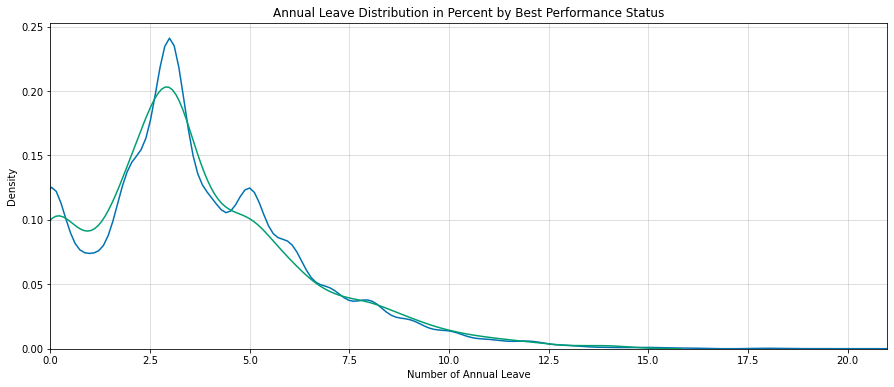

In [62]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'annual leave'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'annual leave'], label = 'Best Performance')
plt.xlim(left=0, right=21)
plt.xlabel('Number of Annual Leave')
plt.ylabel('Density')
plt.title('Annual Leave Distribution in Percent by Best Performance Status');

###Sick Leaves

In [63]:
print("Number of Sick Leaves {} to {}.".format(
    dtready['sick_leaves'].min(), dtready['sick_leaves'].max()))

Number of Sick Leaves 0 to 77.


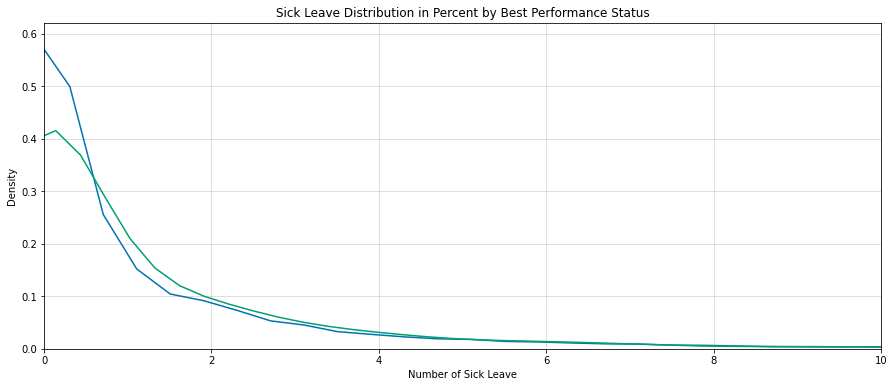

In [64]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'sick_leaves'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'sick_leaves'], label = 'Best Performance')
plt.xlim(left=0, right=10)
plt.xlabel('Number of Sick Leave')
plt.ylabel('Density')
plt.title('Sick Leave Distribution in Percent by Best Performance Status');

###Last Achievement

In [65]:
print("Number of Last Achievement {} to {}.".format(
    dtready['LastAchievement'].min(), dtready['LastAchievement'].max()))

Number of Last Achievement 4.51 to 130.0.


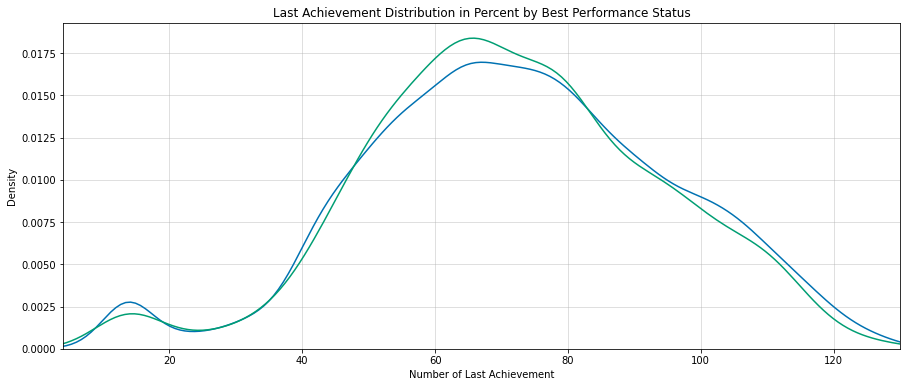

In [66]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'LastAchievement'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'LastAchievement'], label = 'Best Performance')
plt.xlim(left=4, right=130)
plt.xlabel('Number of Last Achievement')
plt.ylabel('Density')
plt.title('Last Achievement Distribution in Percent by Best Performance Status');

### Achievement in 3 Quartal

In [67]:
print("Number of Achievement  in 3 quartal {} to {}.".format(
    dtready['Achievement3quartal'].min(), dtready['Achievement3quartal'].max()))

Number of Achievement  in 3 quartal 0.0 to 3.0.


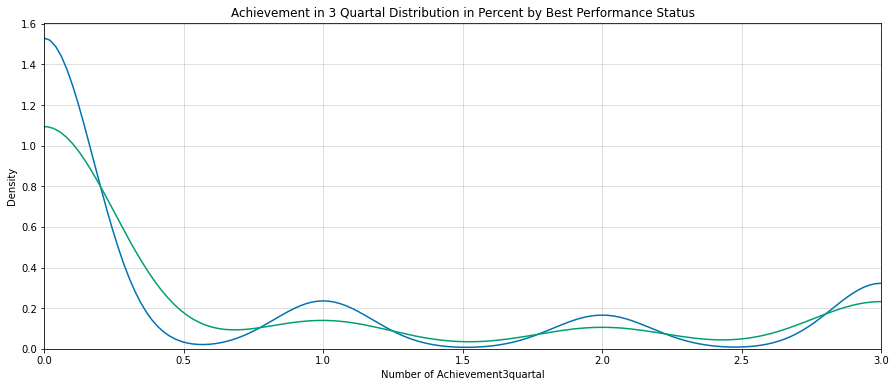

In [68]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dtready.loc[dtready['bestp'] == 0, 'Achievement3quartal'], label = 'No Best Performance')
sns.kdeplot(dtready.loc[dtready['bestp'] == 1, 'Achievement3quartal'], label = 'Best Performance')
plt.xlim(left=0, right=3)
plt.xlabel('Number of Achievement3quartal')
plt.ylabel('Density')
plt.title('Achievement in 3 Quartal Distribution in Percent by Best Performance Status');

###Target Varaibel: Best Performance

In [69]:
dtready['bestp'].value_counts()

0    9515
1    1637
Name: bestp, dtype: int64

In [70]:
print("Percentage of No Best Performance is {:.1f}% and of Best Performance is: {:.1f}%".format(
    dtready[dtready['bestp'] == 0].shape[0] / dtready.shape[0]*100,
    dtready[dtready['bestp'] == 1].shape[0] / dtready.shape[0]*100))

Percentage of No Best Performance is 85.3% and of Best Performance is: 14.7%


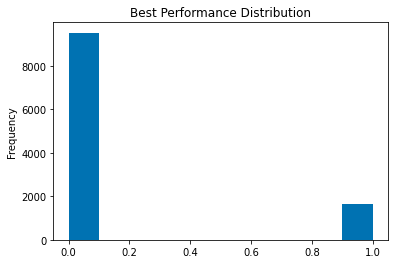

In [71]:
dtready['bestp'].plot(kind='hist', title='Best Performance Distribution')

##Correlation

In [72]:
# Find correlations with the target and sort
df_PA_trans = dtready.copy()
df_PA_trans['bestp'] = df_PA_trans['bestp'].apply(
    lambda x: 0 if x == 0 else 1)
df_PA_trans = df_PA_trans.drop(
    ['job_level', 'person_level', 'Employee_type'], axis=1)
correlations = df_PA_trans.corr()['bestp'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 branch_rotation                         0.016067
job_duration_in_current_person_level    0.016152
job_duration_in_current_branch          0.017272
job_duration_from_training              0.019219
bestp                                   1.000000
Name: bestp, dtype: float64

Most Negative Correlations: 
 gender                  -0.019112
age                     -0.018957
LastAchievement         -0.012643
annual leave            -0.010289
number_of_dependences   -0.010010
Name: bestp, dtype: float64


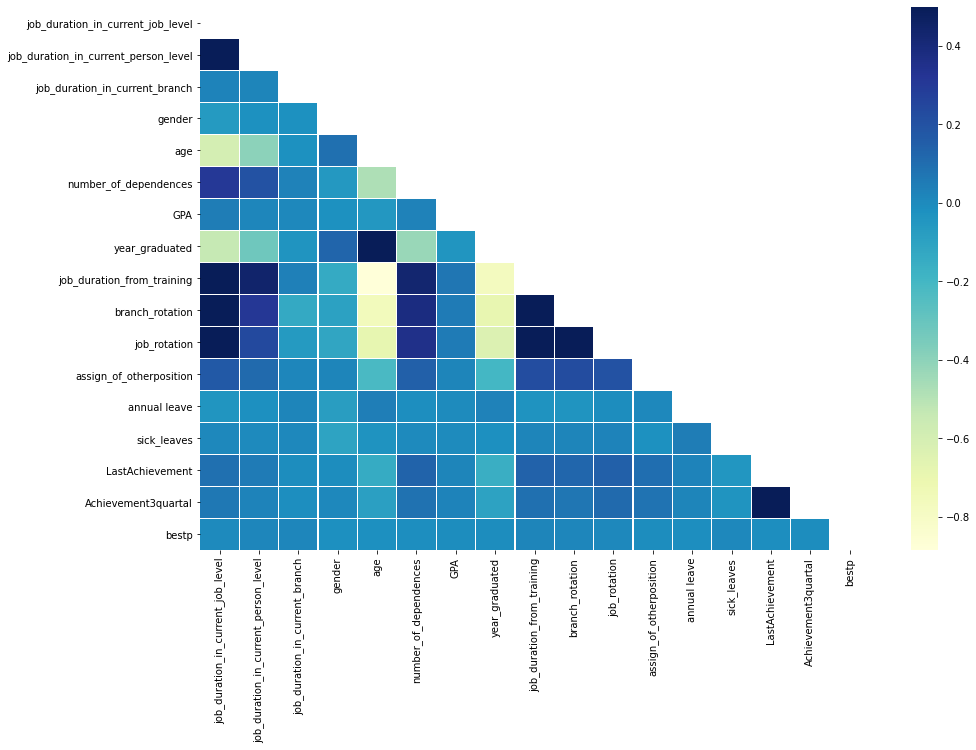

In [86]:
# Calculate correlations
corr = df_PA_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

## Cluster Analysis

Analisis cluster adalah teknik multivariat yang mempunyai tujuan utama untuk mengelompokkan objek-objek/cases berdasarkan karakteristik yang dimilikinya. Analisis cluster mengklasifikasi objek sehingga setiap objek yang memiliki sifat yang mirip (paling dekat  kesamaannya) akan mengelompok kedalam satu cluster (kelompok) yang sama.


In [73]:
#import module
from sklearn.cluster import KMeans

# Filter data
bp_emp =  dtready[['LastAchievement', 'Achievement3quartal']][dtnew.bestp == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(bp_emp)

Menambah kolom label baru dan menetapkan label cluster. Pada plot dapat dilihat bahwa sebanyak 3.0 poin penghargaan merupakan penghargaan akhir tinggi. Sebanyak 2.0 poin penghargaan merupakan penghargaan akhir tinggi dan sekitar 80 penghargaan terakhir termasuk poin tinggi. Sebanyak 1.0 poin penghargaan merupakan penghargaan akhir tinggi dan sebanyak 60 - 80 penghargaan terakhir termasuk poin tinggi. Sebanyak 0.0 poin penghargaan merupakan poin tinggi pada 0-50 penghargaan terakhir dan 60 - 80 merupakan pon tinggi pada penghargaan terakhir. 

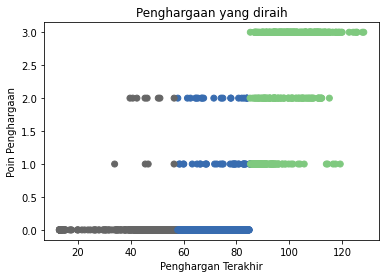

In [74]:
# Add new column "label" and assign cluster labels.
bp_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(bp_emp['LastAchievement'], bp_emp['Achievement3quartal'], c=bp_emp['label'],cmap='Accent')
plt.xlabel('Penghargan Terakhir')
plt.ylabel('Poin Penghargaan')
plt.title('Penghargaan yang diraih')
plt.show()

##Pre Processing Pipeline

###Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [76]:
print(dtready.shape)
dtready.head()

(11152, 22)


,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,LastAchievement,Achievement3quartal,bestp
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [77]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dtready.columns[1:]:
    if dtready[col].dtype == 'object':
        if len(list(dtready[col].unique())) <= 2:
            le.fit(dtready[col])
            dtready[col] = le.transform(dtready[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [78]:
# convert rest of categorical variable into dummy
dtready = pd.get_dummies(dtready, drop_first=True)

In [79]:
print(dtready.shape)
dtready.head()

(11152, 34)


,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,LastAchievement,Achievement3quartal,bestp,job_level_JG04,job_level_JG05,person_level_PG02,person_level_PG03,person_level_PG04,person_level_PG05,person_level_PG06,person_level_PG07,person_level_PG08,Employee_type_RM_type_B,Employee_type_RM_type_C,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_4,Education_level_level_5
0,1.352775,1.352775,1.732051,2,1985,1,1,2.86,2011,4,2,3,2,3,0,46.37,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.292285,1.292285,1.039230,2,1989,1,0,7.28,2007,4,4,3,0,0,1,47.68,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2.565151,2.308679,1.780449,1,1970,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,2.828427,1.000000,1.385641,2,1967,1,2,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2.828427,2.828427,0.707107,2,1965,1,3,7.20,1985,30,9,8,2,3,0,47.18,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


###Features Scaling

In [80]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
PA_col = list(dtready.columns)
PA_col.remove('bestp')
for col in PA_col:
    dtready[col] = dtready[col].astype(float)
    dtready[[col]] = scaler.fit_transform(dtready[[col]])
dtready['bestp'] = pd.to_numeric(dtready['bestp'], downcast='float')
dtready.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,LastAchievement,Achievement3quartal,bestp,job_level_JG04,job_level_JG05,person_level_PG02,person_level_PG03,person_level_PG04,person_level_PG05,person_level_PG06,person_level_PG07,person_level_PG08,Employee_type_RM_type_B,Employee_type_RM_type_C,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_4,Education_level_level_5
0,2.286607,2.391391,3.234231,5.0,3.235294,5.0,0.714286,0.037831,3.918919,0.294118,0.238095,0.714286,0.344828,0.714286,0.000000,1.667862,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.184360,2.284458,1.940539,5.0,3.823529,5.0,0.000000,0.096296,3.378378,0.294118,0.714286,0.714286,0.000000,0.000000,0.064935,1.720057,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,4.335897,4.081207,3.324605,0.0,1.029412,5.0,0.714286,0.000000,0.945946,3.823529,2.142857,2.857143,1.034483,0.476190,0.064935,1.443143,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
3,4.780914,1.767767,2.587385,5.0,0.588235,5.0,1.428571,0.000000,0.675676,3.970588,2.380952,1.785714,0.000000,0.952381,0.649351,1.709698,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,4.780914,5.000000,1.320369,5.0,0.294118,5.0,2.142857,0.095238,0.405405,4.117647,1.904762,2.500000,0.344828,0.714286,0.000000,1.700135,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [81]:
print('Size of Full Encoded Dataset: {}'. format(dtready.shape))

Size of Full Encoded Dataset: (11152, 34)


###Spliting Data intro Training and Testing Sets

In [82]:
# assign the target to a new dataframe and convert it to a numerical feature
target = dtready['bestp'].copy()

In [83]:
type(target)

pandas.core.series.Series

In [104]:
dtready.tail()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,LastAchievement,Achievement3quartal,job_level_JG04,job_level_JG05,person_level_PG02,person_level_PG03,person_level_PG04,person_level_PG05,person_level_PG06,person_level_PG07,person_level_PG08,Employee_type_RM_type_B,Employee_type_RM_type_C,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_4,Education_level_level_5
11148,2.124685,2.222049,2.286947,5.0,3.382353,5.0,0.714286,0.044048,4.594595,0.294118,0.476190,0.714286,0.0,0.952381,0.064935,1.847159,0.000000,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
11149,2.342160,2.449490,3.366294,0.0,3.676471,5.0,1.428571,0.039683,4.459459,0.147059,0.000000,0.357143,0.0,1.428571,0.000000,3.004223,0.000000,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
11150,2.124685,2.222049,2.587385,5.0,4.117647,5.0,0.000000,0.046032,4.729730,0.000000,0.000000,0.357143,0.0,0.952381,0.000000,2.943262,0.000000,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
11151,1.889822,1.976424,0.000000,0.0,3.529412,5.0,0.714286,0.046693,4.054054,0.441176,0.952381,1.071429,0.0,0.952381,0.064935,3.244482,1.666667,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
11152,4.780914,3.750000,2.750681,5.0,2.500000,5.0,1.428571,0.041534,3.648649,1.764706,0.952381,2.142857,0.0,0.476190,0.000000,3.007411,1.666667,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0


In [102]:
# let's remove the target feature and redundant features from the dataset
dtready.drop(['bestp'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(dtready.shape))

KeyError: ignored

In [112]:
# Since we have class imbalance
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(dtready,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8364, 33)
Number transactions y_train dataset:  (8364,)
Number transactions X_test dataset:  (2788, 33)
Number transactions y_test dataset:  (2788,)


##Building Machine Learning Models

In [113]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [114]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,56.77,2.73,85.28,0.53
0,Logistic Regression,52.87,2.00,53.04,1.77
2,SVM,52.72,4.47,85.31,0.59
3,KNN,52.37,1.75,83.57,0.83
5,Gaussian NB,52.24,2.39,16.21,0.86
4,Decision Tree Classifier,51.86,2.30,73.86,1.35


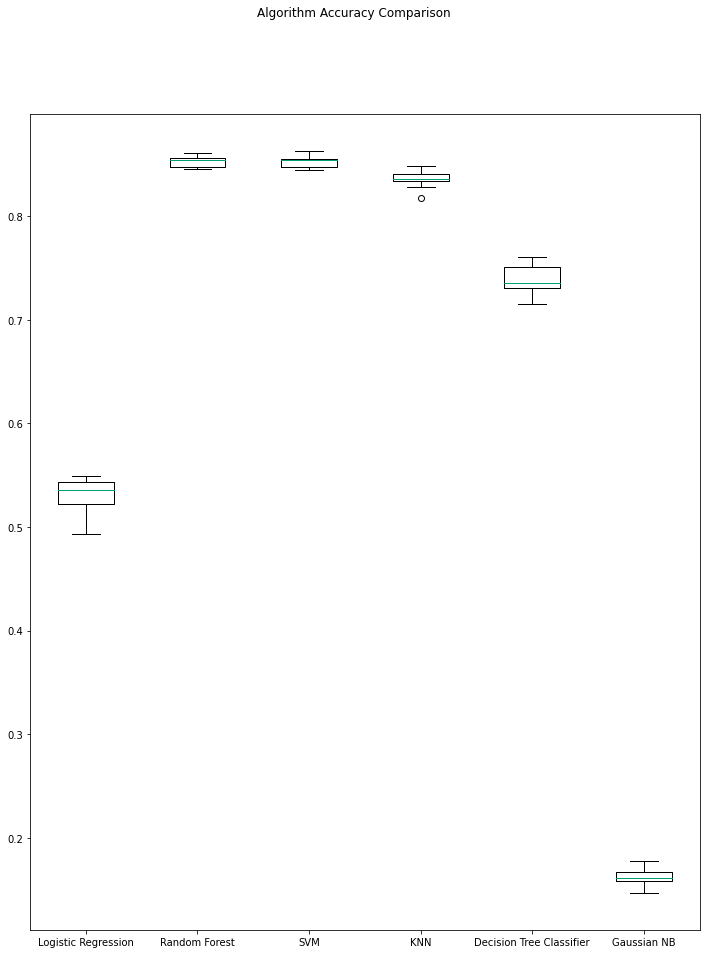

In [115]:
fig = plt.figure(figsize=(12, 15))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

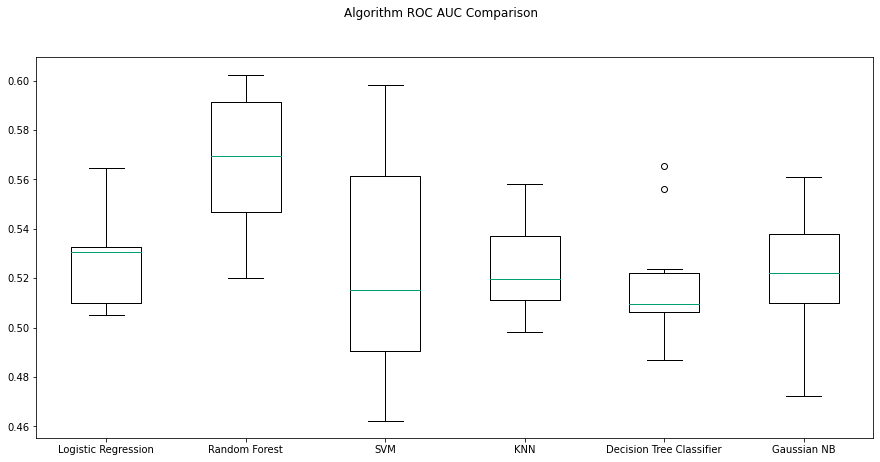

In [116]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

###Random Forest Classifier

In [117]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.56 (0.03)


In [126]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 75}
best score: 0.5822397897128377


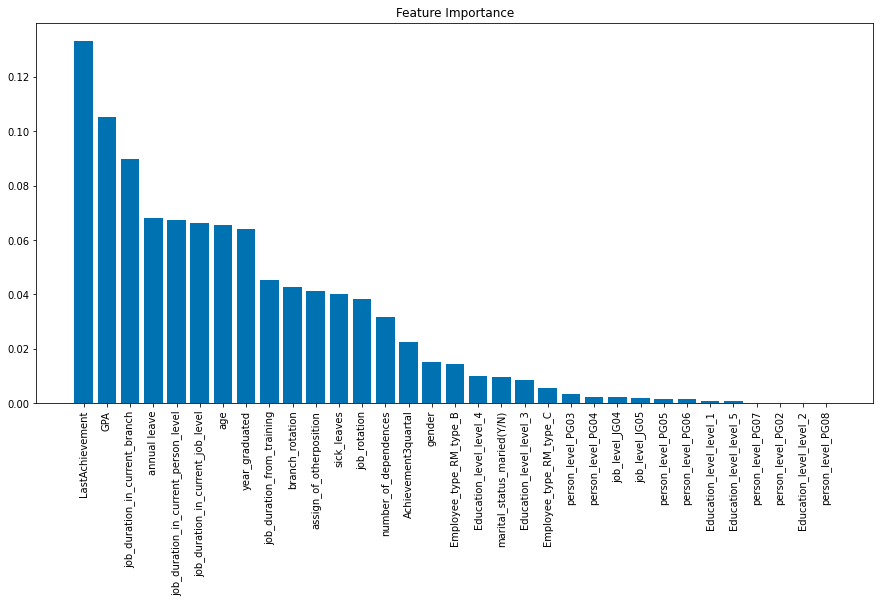

In [127]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [128]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(33):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,LastAchievement,0.133232
1,GPA,0.105044
2,job_duration_in_current_branch,0.089622
3,annual leave,0.068255
4,job_duration_in_current_person_level,0.067500
5,job_duration_in_current_job_level,0.066174
6,age,0.065447
7,year_graduated,0.064163
8,job_duration_from_training,0.045464
9,branch_rotation,0.042891


Text(0.5, 257.44, 'Predicted label')

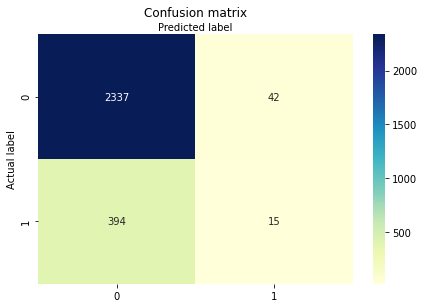

In [129]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [130]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 84.36


In [131]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      2379
         1.0       0.26      0.04      0.06       409

    accuracy                           0.84      2788
   macro avg       0.56      0.51      0.49      2788
weighted avg       0.77      0.84      0.79      2788



In [132]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.554


###Logistic Regression

In [121]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.1609999999999998, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.1609999999999998}
best score: 0.5291805724423521


Text(0.5, 257.44, 'Predicted label')

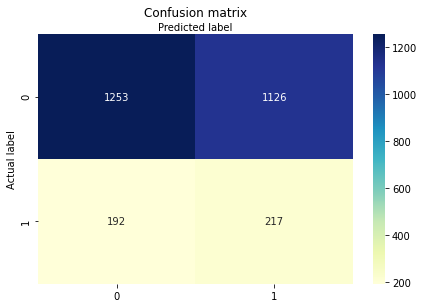

In [122]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 52.73


In [124]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.53      0.66      2379
         1.0       0.16      0.53      0.25       409

    accuracy                           0.53      2788
   macro avg       0.51      0.53      0.45      2788
weighted avg       0.76      0.53      0.60      2788



In [125]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.542


###ROG Graphs

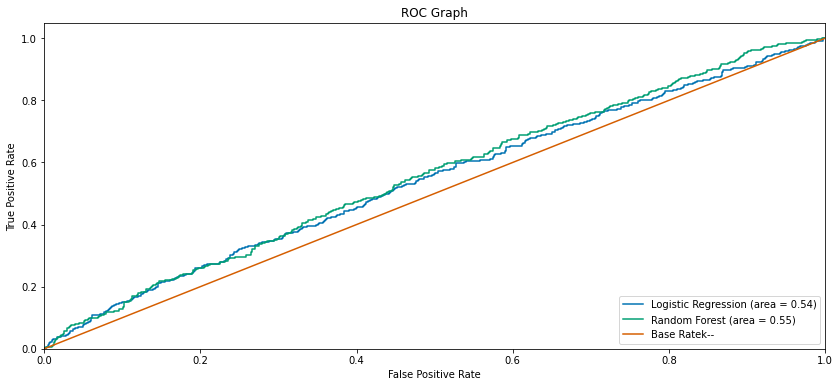

In [133]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [134]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.53 (0.02)


##Testing Data Set

In [ ]:
#ambil dataset dan menunjukkan dari 5 terakhir
dttest = pd.read_csv('/content/test.csv')
dttest.tail()